In [1]:
import os
import random
from tqdm.notebook import tqdm

import numpy as np
import pandas as pd


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

ROOT_DIR = "./data"
RANDOM_SEED = 110

np.random.seed(RANDOM_SEED)
%matplotlib inline

In [2]:
# read csv
df = pd.read_csv(os.path.join(ROOT_DIR, "pre_1.csv"))
df.head()

,Equipment_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE STANDBY POSITION X Collect Result_Dam,CURE STANDBY POSITION Z Collect Result_Dam,CURE STANDBY POSITION Θ Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Z Collect Result_Dam,...,Head Purge Position Y Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,WorkMode Collect Result_Fill2,target,Model.Suffix,Workorder
0,1,240.0,2.5,-90,100,1150,33.5,0,1030,33.5,...,270,50,114.612,19.9,7,127,1,0,AJX75334505,4F1XA938-1
1,1,240.0,2.5,-90,70,1150,33.5,0,1030,33.5,...,50,85,19.600,7.0,185,1,0,0,AJX75334505,3KPM0016-2
2,2,1000.0,12.5,90,85,1150,33.5,0,280,33.5,...,270,50,114.612,19.8,10,73,1,0,AJX75334501,4E1X9167-1
3,2,1000.0,12.5,90,70,1150,33.5,0,280,33.5,...,50,85,19.900,12.0,268,1,0,0,AJX75334501,3K1X0057-1
4,1,240.0,2.5,-90,70,1150,33.5,0,1030,33.5,...,50,85,19.700,8.0,121,1,0,0,AJX75334501,3HPM0007-1


In [ ]:
df["target"].unique()

In [ ]:
# # 우리가 파악해야하는 건 AbNormal이므로 1로 설정
# df["target"] = df["target"].map({"Normal": 0, "AbNormal": 1})
# df["target"] = df["target"].map({0:"Normal", 1:"AbNormal"})

### Resampling

In [19]:
df_org = df.copy()

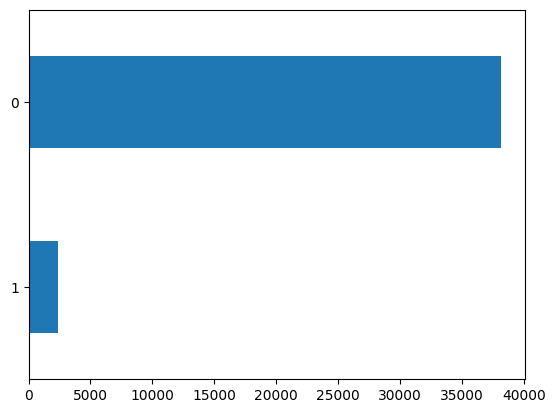

In [70]:
df["target"].value_counts().sort_values().plot(kind="barh");

In [54]:
from sklearn.utils import resample

def random_downsample(df, sample_ratio=1.0, random_seed=RANDOM_SEED):
    df_normal = df[df["target"] == 0] 
    df_abnormal = df[df["target"] == 1]
    
    downsampled = resample(
        df_normal,
        replace=False,
        n_samples=int(len(df_abnormal) * sample_ratio),
        random_state=random_seed
    )
    
    downsampled_df = pd.concat([df_abnormal, downsampled])
    
    return downsampled_df

In [55]:
downsampled_df = random_downsample(df, sample_ratio=3.0)

In [56]:
downsampled_df.info() 
# 40506 entries (original) 
# 4700 entries (sample ratio=1.0)
# 7050 entries (sample_ratio=2.0)
# 9400 entries (sample_ratio=3.0) (Selected)
# 11750 entries (sample_ratio=4.0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9400 entries, 17 to 24490
Columns: 155 entries, Equipment_Dam to Workorder
dtypes: float64(72), int64(77), object(6)
memory usage: 11.2+ MB


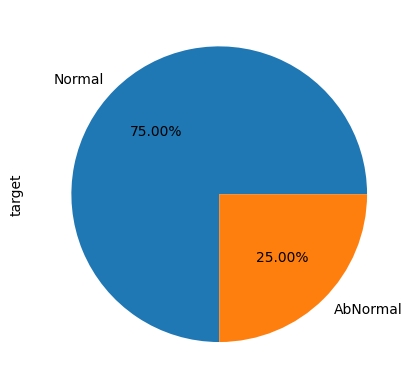

In [69]:
downsampled_df["target"].value_counts().plot.pie(labels=["Normal", "AbNormal"], autopct=lambda x:f"{x:.2f}%");

In [95]:
df.select_dtypes(include=["int64"]).columns

Index(['Equipment_Dam', 'CURE END POSITION Θ Collect Result_Dam',
       'CURE SPEED Collect Result_Dam',
       'CURE STANDBY POSITION X Collect Result_Dam',
       'CURE STANDBY POSITION Θ Collect Result_Dam',
       'CURE START POSITION X Collect Result_Dam',
       'CURE START POSITION Θ Collect Result_Dam',
       'DISCHARGED SPEED OF RESIN Collect Result_Dam',
       'HEAD Standby Position Y Collect Result_Dam',
       'HEAD Standby Position Z Collect Result_Dam',
       'Head Purge Position Y Collect Result_Dam',
       'Production Qty Collect Result_Dam', 'Receip No Collect Result_Dam',
       'Stage1 Circle1 Distance Speed Collect Result_Dam',
       'Stage1 Circle2 Distance Speed Collect Result_Dam',
       'Stage1 Circle3 Distance Speed Collect Result_Dam',
       'Stage1 Circle4 Distance Speed Collect Result_Dam',
       'Stage1 Line1 Distance Speed Collect Result_Dam',
       'Stage1 Line2 Distance Speed Collect Result_Dam',
       'Stage1 Line3 Distance Speed Collect Resu

In [97]:
df['HEAD Standby Position Z Collect Result_Fill2'].unique()

array([ 50, -10], dtype=int64)

In [89]:
df["Workorder"].str.split('-', expand=True)[0].str[:5].unique()

array(['4F1XA', '3KPM0', '4E1X9', '3K1X0', '3HPM0', '3G1X8', '3M1XH',
       '4A1XB', '3H1X9', '3G1XD', '4A1XC', '3L1XA', '3L1X8', '3GPM0',
       '3G1X4', '3F1X9', '4B1XA', '3L1XB', '4C1X0', '4B1XD', '3G1XB',
       '3MPXX', '3H1XD', '3M1XC', '3I1XB', '4B1X9', '3G1XC', '3M1XF',
       '4B1XC', '4C1XG', '3J1XF', '3F1XB', '3J1XC', '3K1XA', '4C1XH',
       '3L1X9', '4F1X8', '3H1XE', '4F1XB', '3I1XA', '3K1X9', '3J1XD',
       '4C1XD', '4E1X0', '4E1XB', '4B1X6', '3M1XG', '3H1X7', '3H1X8',
       '3K1XB', '3J1XE', '3H1XC', '3L1X1', '3F1XC', '4C1XJ', '3M1XB',
       '4A1XA', '3G1XA', '3K1XC', '3H1X3', '3K1X1', '3JPXX', '3I1X9',
       '4B1XB', '3G1X9', '4F1X9', '4CPM0', '4E1XA', '4B1XE', '4A1XE',
       '4E1XC', '3J1XG', '3H1XA', '3K1X8', '3F1X5', '3J1XB', '3LPM0',
       '4C1X2', '3K1X7', '3H1XF', '3J1X8', '3M1X0', '4BPXX', '4BPM0',
       '4E1X2', '3H1X4', '3M1XD', '4F1X6', '3J1X7', '3F1XA', '4E1X7',
       '4A1X9', '3HPXX', '4C1XF', '4CPXX', '3J1XA', '4C1XE', '4EPM0',
       '3FPM0', '3J1

In [93]:
df["Workorder"].str.split('-', expand=True)[0].unique()

array(['4F1XA938', '3KPM0016', '4E1X9167', '3K1X0057', '3HPM0007',
       '3G1X8297', '3M1XH425', '4A1XB542', '3H1X9883', '3G1XD171',
       '4E1X9168', '4A1XC343', '3L1XA128', '3L1X8574', '3GPM0070',
       '3G1X4502', '3F1X9648', '4B1XA868', '3L1XB019', '4C1X0049',
       '4B1XD472', '4B1XD691', '3G1XB994', '4B1XA871', '3MPXX030',
       '3H1XD883', '3M1XC472', '3H1X9881', '3I1XB425', '4B1X9674',
       '3G1XC498', '4A1XB975', '3M1XF736', '4B1XC717', '4C1XG294',
       '3G1XC759', '3J1XF461', '3L1XA998', '3K1X0791', '3F1XB560',
       '3J1XC148', '4E1X9997', '3I1XB274', '3K1XA736', '4C1XH941',
       '4C1XH315', '4A1XC346', '3L1X9934', '4F1X8043', '3H1XE851',
       '4F1XB043', '3I1XA510', '3K1X9801', '3L1XB735', '3M1XH386',
       '3G1XC632', '4C1XH944', '4B1XC718', '3J1XD560', '4B1X9672',
       '4E1X9995', '4C1XD437', '4E1X0056', '4E1XB049', '4B1X6364',
       '3M1XG287', '4B1XC551', '3H1X7981', '3K1X9888', '3G1XB952',
       '4E1XB350', '3H1X8428', '3K1XB239', '3J1XE079', '3M1XH3

In [77]:
df["Chamber Temp. Judge Value_AutoClave"].unique()

array(['OK', 'NG'], dtype=object)

In [58]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import KMeansSMOTE
from imblearn.combine import SMOTEENN

def upsample(df, method, random_seed=RANDOM_SEED):
    X = df.drop("target", axis=1)
    y = df["target"]
    # SMOTE
    if method == "smote":
        smote = SMOTE(random_state=random_seed)
        X_upsampled, y_upsampled = smote.fit_resample(X, y)
    # ADASYN
    elif method == "adasyn":
        adasyn = ADASYN(random_state=random_seed)
        X_upsampled, y_upsampled = adasyn.fit_resample(X, y)
    # SMOTE-NC (both numerical & categorical features)
    elif method == "smotenc":
        smotenc = SMOTENC(random_state=random_seed, categorical_features=)
    
    upsampled_df = pd.concat([X_upsampled, y_upsampled])
    
    
    return upsampled_df


def borderline_smote_upsample(df, random_seed=RANDOM_SEED):
    X = df.drop("target", axis=1)
    y = df["target"]
    
    borderline_smote = BorderlineSMOTE(random_state=random_seed)
    X_upsampled, y_upsampled = borderline_smote.fit_resample(X, y)
    
    upsampled_df = pd.concat([X_upsampled, y_upsampled])
    
    return upsampled_df

def kmeans_smote_upsample(df, random_seed=RANDOM_SEED):
    X = df.drop("target", axis=1)
    y = df["target"]
    
    kmeans_smote = KMeansSMOTE(random_state=random_seed)
    X_upsampled, y_upsampled = kmeans_smote.fit_resample(X, y)
    
    upsampled_df = pd.concat([X_upsampled, y_upsampled])
    
    return upsampled_df


def smote_enn_upsample(df, random_seed=RANDOM_SEED):
    X = df.drop("target", axis=1)
    y = df["target"]
    
    smote_enn = SMOTEENN(random_state=random_seed)
    X_upsampled, y_upsampled = smote_enn.fit_resample(X, y)
    
    upsampled_df = pd.concat([X_upsampled, y_upsampled])
    
    return upsampled_df